# Animals Classifier using Deep Convolutional Neural Network
<p> In this notebook you will see the all  process  for  building powerfull classifier. Here I'm using four multiple classes for making powerfull and complete Animal Classifier.</p>
<br>
<br>

<center><img src="https://cdn.shopify.com/s/files/1/0942/4382/products/jigsaw-puzzle-99-funny-animals-1000-piece-jigsaw-puzzle-1.jpg?v=1524666861" height=22% width=60%></center>


## Dataset :

Here in this project I am using an animals dataset  with three classes. In this dataset my goal is to  classify animals and predict the animal names. 

<b>Training Data<b><br>
  Dog : 2000 Samples<br>
  Bird:  2000 Samples<br>
  Tiger:2000 Samples<br>


## Convolutional Neural Network :

In deep learning Convolutional Neural Network is a class of deep neural network, the term convolutional refers to the mathematical  combination of two functions to produce a third function. In case of a CNN the convolutional is performed  on the input data with the use of a filter or kernal to produce a feature map.

<br><br>
<center><img src="https://cdn-images-1.medium.com/max/1600/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" height=42%  width=60% /> <br>Reference : meduim</center>
<br>
Convolutional Neural Networks (CNNs / ConvNets) ... ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.



  

# Flickr api 
Here I am using flickr api for downloading Dataset. This Api program is written by <a href="https://github.com/saugatapaul1010/Building-extremely-powerful-object-recognizers-using-very-little-data/tree/master/Transfer%20Learning">Sauagata Paul</a>

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from datetime import datetime as dt
global_start = dt.now()


import os
cur_dir = os.getcwd()

def get_images_train():
    
    #What categories of images you want to download?
    #What's the total of images you want to download?
    #Fraction of images you want for test data? (0 to 1)
    
    import flickrapi
    import urllib.request as geturl
    from PIL import Image
    
    category=input("What class of images?: ")
    n=int(input("How many?: "))
            
    #Creating the initial directory structures
    import os
    cur_dir = os.getcwd()
    cat_name=cur_dir+'/train'+'/{}'.format(category)
    if not os.path.isdir(cur_dir+'/train'):
        os.mkdir(cur_dir+'/train')
    else:
        print("Flicker folder is already present.")
        cat_name=cur_dir+'/train'+'/{}'.format(category)
        
    if not os.path.isdir(cat_name):
        os.mkdir(cat_name)
    else:
        print("{} folder is already present.".format(category))

    #Using the FlickrAPI key to access flicker 
    flickr=flickrapi.FlickrAPI('c6a2c45591d4973ff525042472446ca2', '202ffe6f387ce29b', cache=True)
    keyword = category
    photos = flickr.walk(text=keyword,tag_mode='all',tags=keyword,extras='url_c',per_page=100,sort='relevance')

    #Build a list of valid URLS, we will use these URLs to retrieve images
    url_lists = []
    count=1
    for i, photo in enumerate(photos):
        url = photo.get('url_c')
        if(url!=None):
            url_lists.append(url)
            count+=1

        #Get 'n' valids URLS for 'n' images you want to download
        if count > n:
            break

    #This block actually downloads all the 'n'  images belonging to 'keywords' category 
    print("Downloading {} images...".format(category))
    from tqdm import tqdm
    i=1
    for url in tqdm(url_lists):
        folder = cat_name
        geturl.urlretrieve(url, folder+'/{}{}.jpg'.format(category,i))
        image = Image.open(folder+'/{}{}.jpg'.format(category,i)) 
        image = image.resize((256, 256), Image.ANTIALIAS)
        image.save(folder+'/{}{}.jpg'.format(category,i))
        i+=1

    path = folder.split("/")[-3:]
    f_path=""
    for i in path:
        f_path =f_path + "/" + i

    print("{} training images of '{}' downloaded and saved in folder '{}'".format(len(url_lists),category,f_path))


In [0]:
#downloading images using Flickr api 
get_images_train()

What class of images?: tiger
How many?: 500
Flicker folder is already present.


  0%|          | 1/500 [00:00<01:38,  5.09it/s]

100%|██████████| 500/500 [01:26<00:00,  5.48it/s]

500 training images of 'tiger' downloaded and saved in folder '/content/test/tiger'


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#imporitng libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


##  Importing Dataset 

In [0]:
#Declaration of parameters needed for training and validation
train_data_dir =("/content/train")
test_data_dir =("/content/test")


##  Defining  Convolutional Neural Network Architecture

*Here I am using  two  hidden layers for building  a perfect  animals classifier*

In [0]:
#Initialising the Input shape
input_shape = (64,64,3)


# Initialising the CNN
model = Sequential()
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', kernel_initializer='he_normal'))


#Compile the model

adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
__________

In [20]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'categorical')

history= model.fit_generator(training_set,
                         steps_per_epoch =300,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 70)

from keras.models import load_model
model.save("animalclassifier.h5")

Found 6000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Epoch 1/10
300/300 [==============================] - 1514s 5s/step - loss: 0.7862 - acc: 0.6881 - val_loss: 0.4477 - val_acc: 0.7945
Epoch 2/10
300/300 [==============================] - 1524s 5s/step - loss: 0.4237 - acc: 0.8329 - val_loss: 0.3538 - val_acc: 0.8632
Epoch 3/10
300/300 [==============================] - 1523s 5s/step - loss: 0.3295 - acc: 0.8712 - val_loss: 0.3747 - val_acc: 0.8468
Epoch 4/10
300/300 [==============================] - 1520s 5s/step - loss: 0.2680 - acc: 0.8970 - val_loss: 0.1811 - val_acc: 0.9282
Epoch 5/10
300/300 [==============================] - 1539s 5s/step - loss: 0.2208 - acc: 0.9149 - val_loss: 0.3432 - val_acc: 0.8607
Epoch 6/10
300/300 [==============================] - 1531s 5s/step - loss: 0.1912 - acc: 0.9292 - val_loss: 0.1774 - val_acc: 0.9387
Epoch 7/10
300/300 [==============================] - 1519s 5s/step - loss: 0.1652 - acc: 0.9382 - val_loss: 0.1

# Predict classes

In [23]:
import numpy 
#model performance testing using test dataset
test_data_path = "/content/test"
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
                                                test_data_path,
                                                target_size=(64, 64),
                                                batch_size=16,
                                                shuffle=False)

test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

pred = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
pred_classes = numpy.argmax(pred, axis=1)

Found 1500 images belonging to 3 classes.


# Classification Report

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

report = metrics.classification_report(true_classes, pred_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

        bird       0.55      0.99      0.71       500
         dog       0.99      0.48      0.65       500
       tiger       0.94      0.68      0.79       500

    accuracy                           0.72      1500
   macro avg       0.83      0.72      0.71      1500
weighted avg       0.83      0.72      0.71      1500



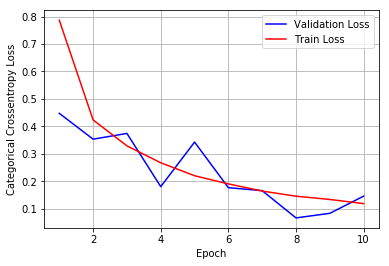

In [43]:
#This function is used to plot/update the train and test loss after each epoch.
import matplotlib.pyplot as plt
def plt_dynamic_loss(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

epochs=10
#Get model history
history=model.history

#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,epochs+1))

#Display the loss
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)

So here is the result not too much better, this is a real world dataset which I download from flickr api so this is reason for bad result, Still I am working on it for getting more accuracy and good model 